# Pandas Tutorial

Today we will do a crash course in `numpy`. `numpy` is the main package for scientific computing in Python. If you do data science or machine learning, this is a must know. 

`numpy` is:

* Core library for scientific computing
    * Data science, machine learning, deep learning, etc.
    * Core of scikit-learn, matplotlib, pandas, etc.
* High performance multidimensional array which is fast
* Mathematical operations with arrays
* A lot of code written in C; this is why it is so fast

`numpy` usecases:

* Array/matrix operations; linear algebra
* Dot product
* Matrix multiplications
* Linear systems
* Inverse, determinant
* Eigenvectors
* Random numbers
* Working with images represented as an array 

## Installation & Basics

If you are working with `conda` or `pip`, just do:

* `conda install numpy`
* `pip install numpy`

To load the library and check the version:

In [1]:
# Importing
import numpy as np

# Checking version
print(np.__version__)

1.21.5


In [2]:
# Creating an array
a = np.array([1,2,3]) # A list goes inside of an array 

# Display the result
print(a) # This has one dimension so far

[1 2 3]


In [3]:
# Get the dimensions of the array
print(a.shape) # One dimension with 3 elements

(3,)


In [4]:
# Get the data type of the array
print(a.dtype) #Int32

int32


In [5]:
# Print the number of dimensions
print(a.ndim)

1


In [6]:
# Looking at the array size
print(a.size) # This will return the total number of elements in the array; in this case we have 3

3


In [7]:
# Looking at the item size
print(a.itemsize) # This will return the length of one array element in bytes

4


In [8]:
# Using indices 
print(a[0])

1


In [9]:
# Changing the index of an array to another value
a[0] = 10
print(a[0])

10


In [10]:
# Mathematical operations with arrays; they work element-wise
b = a * np.array([4,5,6]) # All of the elements will be multiplied with each other
print(b)

[40 10 18]


## Python Lists Versus Arrays

In [11]:
# Creating a python list
l = [1,2,3]

# Creating a numpy array
a = np.array([1,2,3])

# Display list and array
print(l)
print(a)

[1, 2, 3]
[1 2 3]


Although, at first, a list and an array look similar, there are differences.

In [12]:
# Adding an element to a list
l.append(4)
print(l)

[1, 2, 3, 4]


In [13]:
# Adding an element to an array incorrectly
a.append(4)

AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [14]:
# Another way of adding an element to a list
l = l + [4]
print(l)

[1, 2, 3, 4, 4]


In [15]:
# Adding an element to an array incorrectly 
a = a + np.array(4)
print(a)

[5 6 7]


We see that our array still has 3 elements and that 4 has been added to each of the elements. This operation works signficantly different on arrays compared to lists.

In [16]:
# Python list multiplication
l *= 2
print(l)

[1, 2, 3, 4, 4, 1, 2, 3, 4, 4]


In [17]:
# Using the same operation with numpy
a = a * 2
print(a)

[10 12 14]


When we multiplied the list by 2, it repeated itself 2 times. When we multiplied our array by 2, all of the elements in the array were multiplied by 2. This is generally how mathematical operations work in `numpy`; they work element-wise.

In [18]:
# Square root method
a = np.sqrt(a)
print(a)

[3.16227766 3.46410162 3.74165739]


In [19]:
# Log method
a = np.log(a)
print(a)

[1.15129255 1.24245332 1.31952866]


## Dot Product

It is very useful in data science and machine learning to calculate the dot product of vectors. Dot product is an algebraic operation that takes two equal-length sequences of numbers (usually coordinate vectors), and returns a single number. Algebraically, the dot product is the sum of the products of the corresponding entries of the two sequences of numbers. Geometrically, it is the product of the Euclidean magnitudes of the two vectors and the cosine of the angle between them.

For the algebriac definition, the dot product of two vectors $a = [a_{1}, a_{2}, ..., a_{n}]$ and $b = [b_{1}, b_{2}, ..., b_{n}]$ is defined as:

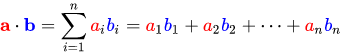

In Euclidean space, a Euclidean vector is a geometric object that possesses both a magnitude and a direction. A vector can be pictured as an arrow. Its magnitude is its length, and its direction is the direction to which the arrow points. The magnitude of a vector a is denoted by $||a||$. The dot product of two Euclidean vectors $a$ and $b$ is defined by:

$$ a \cdot b = ||a|| \, ||b|| cos \theta $$

In [20]:
# To calculate the dor product between 2 arrays with a lost
l1 = [1,2,3]
l2 = [4,5,6]

# Create a variable to hold the dot product
dot = 0

# Loops over lists
for i in range(len(l1)):
    dot += l1[i] * l2[i]
print(dot)

32


In [21]:
# Calculating dot product with numpy
a1 = np.array(l1)
a2 = np.array(l2)
dot = np.dot(a1, a2)
print(dot)

32


As we can see, using `numpy` is much faster. Now, as an example let's do it manually step-by-step.

In [22]:
# This works element-wise
sum1 = a1 * a2 # Element-wise multiplication
dot = np.sum(sum1) # Summing results
print(dot)

32


All of those methods is an instanced methods, so we can call them on the array object.

In [23]:
# Using the methods on an array
dot = (a1 * a2).sum()
print(dot)

32


In newer version, we can use the `@` sign.

In [24]:
# Using the 'at' symbol for the dot product
dot = a1 @ a2
print(dot)

32


## Speed Test: Arrays Versus Lists

In [25]:
# Speed test lists vs array
from timeit import default_timer as timer

# Generating random numbers as numpy array
a = np.random.randn(1000)
b = np.random.randn(1000)

# Converting the numpy arrays to lists
A = list(a)
B = list(b)

# We calculate the dot product 1000 times 
T = 1000

# Doing dot product manually with a for loop with lists
def dot1():
    dot = 0
    for i in range(len(A)):
        dot += A[i]*B[i]
    return dot

# Doing it in one line with numpy arrays
def dot2():
    return np.dot(a,b)

# Calculating how long it takes for lists
start = timer()
for t in range(T):
    dot1()
end = timer()
t1 = end-start

# Calculating how long it takes for arrays
start = timer()
for t in range(T):
    dot2()
end = timer()
t2 = end-start

# Displaying the results
print('Time with lists:', t1)
print('Time with array:', t2)
print('Ratio', t1/t2)

Time with lists: 0.20240579999999753
Time with array: 0.0013098000000013599
Ratio 154.5318369215051


As we can see, the list calculations take much longer than arrays. `numpy` arrays are about 157 times faster when using mathematical operations. 

## Multidimensional (nd) Arrays

In [26]:
# Making a one dimensional array
a = np.array([1,2])
print(a)
print(a.shape) # One row

[1 2]
(2,)


In [27]:
# To make a multi dimensional array, we can pass in a list of lists
a = np.array([[1,2], [3,4]]) # A list of lists is denoted with double brackets [[]]
print(a)
print(a.shape) # 2x2 (rows by columns) array

[[1 2]
 [3 4]]
(2, 2)


In [28]:
# Passing in more items to make a 3x2 array
a = np.array([[1,2], [3,4], [5,6]])
print(a)
print(a.shape)

[[1 2]
 [3 4]
 [5 6]]
(3, 2)


In [29]:
# Passing in items to make a 2x3 array
a = np.array([[1,2,6], [3,4,8]])
print(a)
print(a.shape)

[[1 2 6]
 [3 4 8]]
(2, 3)


Now, we will show how to access the elements of an array.

In [30]:
# Entire first row
print(a[0])

[1 2 6]


In [31]:
# Single element in the first row and column
print(a[0][0]) # Longer syntax 

# Or
print(a[0, 0]) # Shorter syntax 

1
1


Now, let's quickly talk about slicing.

In [32]:
# Display all the rows and only column 0
print(a[:, 0])

[1 3]


In [33]:
# Display all the columns and only row 0
print(a[0, :])

[1 2 6]


In [34]:
# Transposing an array 
print(a.T)

[[1 3]
 [2 4]
 [6 8]]


In [36]:
# Calculate the inverse of an array; the array must be square
a = np.array([[1,2], [3,4]])
print(np.linalg.inv(a)) # The array must be square to use this

[[-2.   1. ]
 [ 1.5 -0.5]]


In [37]:
# Calculating the determinant of an array 
print(np.linalg.det(a))

-2.0000000000000004


In [38]:
# Calculate the diagonal of the matrix
print(np.diag(a)) # This will return the diagonal elements of an array; it will be a one dimensional vector

[1 4]


However, if we pass in a one-dimensional vector to the `np.diag()` function, it will make a matrix with the one-dimensional vector along the diagonal.

In [39]:
# Making a matrix out of a diagonal vector
c = np.diag(a)
print(np.diag(c))

[[1 0]
 [0 4]]


## Indexing/Slicing/Boolean Indexing

We have briefly showed slicing. It is similar to lists, where we can slice the indices. Since arrays can be multidimensional, we must specify a slice for every dimension in our array.

In [41]:
# Making the array for indexing
a = np.array([[1,2], [3,4]])
print(a)

# Have only 1 value using integer array indexing
b = a[0, 1] # Getting row 0 and column 1 value
print(b)

[[1 2]
 [3 4]]
2


In [42]:
# Making the array for slicing
a = np.array([[1,2,3, 4], [5,6,7,8]])
print(a)

[[1 2 3 4]
 [5 6 7 8]]


In [43]:
# Getting the entirety of row 0
b = a[0, :] # : indicates selecting all columns; this can be done for rows with a[:, 0] for example
print(b)

[1 2 3 4]


In [44]:
# We can put in start and stop values; remember, the last index is excluded
b = a[0, 1:3] # Selecting the entire row and columns 1 and 2
print(b)

[2 3]


In [45]:
# Selecting using negative indexing
b = a[-1, -1] # This will select the very last element in the array; can also do a[-1, -2] for second last column
print(b)

8


In [46]:
# Making an array for boolean indexing
a = np.array([[1,2], [3,4], [5,6]]) # This will make a 3x2 array 
print(a)

[[1 2]
 [3 4]
 [5 6]]


In [47]:
# Using boolean indexing
bool_idx = a > 2 # Contains True/False values and will be the same shape as the original array 
print(bool_idx) 

[[False False]
 [ True  True]
 [ True  True]]


In [48]:
# Now we can index the original array using the array we creating using boolean indices
print(a[bool_idx]) # This will print only the elements where the condition we specified is met; the array will be 1 D

[3 4 5 6]


In [49]:
# We can do this process using only one step rather than 2
print(a[a > 2])

[3 4 5 6]


In [50]:
# If we want to have an array that is still the same size, we can use the .where method
b = np.where(a > 2, a, -1) # Array will be the same shape and the positions where it is not true will have -1
print(b)

[[-1 -1]
 [ 3  4]
 [ 5  6]]


In [53]:
# Using fancy indexing; making an array
a = np.array([10, 19, 30, 41, 50, 61])
print(a)

# Creating an array with just some indicies
b = [1, 3, 5] # Using a python list to specify indices
print(a[b])

[10 19 30 41 50 61]
[19 41 61]


In [54]:
# Using a dummy example to find the even indices
even = np.argwhere(a % 2 == 0).flatten() # .flatten() makes the array one dimensional 
print(a[even])

[10 30 50]


## Reshaping Arrays

In [56]:
# Creating an array using the arrange function
a = np.arange(1, 7) # This will create an array with numbers 1-6
print(a)

[1 2 3 4 5 6]


In [58]:
# Checking the shape
print(a.shape) # It is one dimension with 6 elements

(6,)


In [60]:
# Reshaping the array
b = a.reshape((2,3)) # Must put in a tuple; the array will be reshaped to a 2x3 array
print(b)
print(b.shape)

[[1 2 3]
 [4 5 6]]
(2, 3)


If the shape cannot be used, meaning the original vector cannot fit into the new shape, `numpy` will give you an error. So, for example, if you have a one-dimensional vector with 6 elements and try to reshape is to 2x4, which would require 8 elements, it will not work. 

In [62]:
# Using the .newaxis method to create a new axis; this is needed when a model needs the data to be shaped in a certain manner
b = a[np.newaxis, :] # This will make a list of lists
print(b)
print(b.shape)

[[1 2 3 4 5 6]]
(1, 6)


In [63]:
# Making a new axis on the other way around
b = a[:, np.newaxis] # This will make a list of lists
print(b)
print(b.shape)

[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]
(6, 1)


## Concatenation

In [65]:
# Appending an element to a numpy array; making the arrays

# First array
a = np.array([[1,2], [3,4]])
print(a)

# Second array
b = np.array([[5,6]])
print(b)

[[1 2]
 [3 4]]
[[5 6]]


In [66]:
# Putting the arrays together; default
c = np.concatenate((a,b)) # Needs the 2 arrays as a tuple 
# By default, numpy will add the second array along axis 1, meaning a new row; by default the argument axis = 0
print(c)

[[1 2]
 [3 4]
 [5 6]]


In [68]:
# Putting the arrays together; axis = None
c = np.concatenate((a,b), axis = None) # This will flatten the array into a one dimensional object
print(c)

[1 2 3 4 5 6]


In [69]:
# Putting arrays together; axis = 1
c = np.concatenate((a,b), axis = 1) # This will throw an error because the dimensions to no match
print(c)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 2 and the array at index 1 has size 1

As we can see, we get a value error because the dimensions do not match. In this case, a = 2x2 and b = 1x2. But, b must be 2x1 to match the dimensions.

In [70]:
# Transposing b so we can add it as a column
c = np.concatenate((a,b.T), axis = 1)
print(c)

[[1 2 5]
 [3 4 6]]


In [71]:
# Using hstack; stacking arrays in squence horizontally column-wise; one column after another
a = np.array([1,2,3,4])
b = np.array([5,6,7,8])
c = np.hstack((a,b)) # Takes a tuple
print(c)

[1 2 3 4 5 6 7 8]


In [72]:
# Using vstack; stacking arrays vertically row-wise; adds the second array as a new row
a = np.array([1,2,3,4])
b = np.array([5,6,7,8])
c = np.vstack((a,b)) # Takes a tuple
print(c)

[[1 2 3 4]
 [5 6 7 8]]


## Broadcasting

This a powerful mechanism of `numpy` which allows arrays to work with arrays of different shapes when doing mathematical operations.

In [74]:
# Making a big array
x = np.array([[1,2,3], [4,5,6], [1,2,3], [4,5,6]])
print(x)

# Making a smaller array
a = np.array([1,0,1])
print(a)

[[1 2 3]
 [4 5 6]
 [1 2 3]
 [4 5 6]]
[1 0 1]


In [75]:
# Adding a to x
y = x + a # This will [1, 0, 1] to each row element-wise
print(y)

[[2 2 4]
 [5 5 7]
 [2 2 4]
 [5 5 7]]


When operating on two arrays, `numpy` compares their shapes element-wise. It starts with the trailing (i.e. rightmost) dimensions and works its way left. Two dimensions are compatible when:

* They are equal, or
* They are 1

If these conditions are not met, a `ValueError: operands could not be broadcast together` exception is thrown, indicating that the arrays have incompatible shapes.

In [76]:
# Example of broadcasting not working
# Making a big array
x = np.array([[1,2,3], [4,5,6], [1,2,3], [4,5,6]])
print(x)

# Making a smaller array
a = np.array([1,0])
print(a)

[[1 2 3]
 [4 5 6]
 [1 2 3]
 [4 5 6]]
[1 0]


In [83]:
# Adding a to x
y = x + a # This will [1, 0, 1] to each row element-wise
print(y)

ValueError: operands could not be broadcast together with shapes (4,3) (2,7) 

## Functions & Axis

In [78]:
# Creating a new array
a = np.array([[7,8,9,10,11,12,13], [17,18,19,20,21,22,23]])
print(a)

[[ 7  8  9 10 11 12 13]
 [17 18 19 20 21 22 23]]


In [80]:
# Calculating the sum of a
print(a.sum()) # This is the total sum of the entire array 

210


In [81]:
# Calculating the sum of a using the axis argument
print(a.sum(axis = None)) # = None is the default 

210


In [82]:
# Calculating the sum along the rows
print(a.sum(axis = 0)) # = 0 is calculating the sum row-wise; so 7+17, 8+18, etc. we get one entry per each column

[24 26 28 30 32 34 36]


In [84]:
# Calculating the sum along the columns
print(a.sum(axis = 1)) # = 1 is calculating the sum column-wise; so 7+8+9, 17+18+19, etc. we get one entry per each row

[ 70 140]


In [86]:
# Can also use the mean 
print(a.mean(axis = 1)) # This will calculate the mean over all columns
print(a.mean(axis = 0)) # Calculate the mean for each column; 17+7/2, 18+8/2, etc. 
print(a.mean(axis = None)) # Overall mean

[10. 20.]
[12. 13. 14. 15. 16. 17. 18.]
15.0


In [87]:
# Calculating the variance
print(a.var(axis = None))

29.0


In [88]:
# Calculating the standard deviation
print(a.std(axis = None))

5.385164807134504


In [89]:
# Getting the minimum or maximum
print(a.min(axis = None))
print(a.max(axis = None))

7
23


## Datatypes

In [92]:
# Creating an array without a datatype; it can figure it out on its own
x = np.array([1, 2]) #Int32
print(x.dtype)

int32


In [95]:
# Float
x = np.array([1.0, 2.0])
print(x.dtype)

float64


In [94]:
# Can pass the dtype = argument to set the type
x = np.array([1.0, 2.0], dtype = np.int64)
print(x.dtype)

int64


In [96]:
# Can pass the dtype = argument to set the type
x = np.array(['a', 'b'])
print(x.dtype)

<U1


You can check the `numpy` documentation to check all of the data types. Typically, for machine learning, we will use either float32 or float64.

## Copying Arrays

In [97]:
# Making a new array and copying
a = np.array([1,2,3])
b = a

# Modifying b
b[0] = 42

# Displaying a & b
print(a)
print(b)

[42  2  3]
[42  2  3]


As you can see, `a` also has 42 as the first value, even though we only changed it for `b`. This is because we only copied the reference to `b`. Both objects point to the same location in the memory; this is why it modifies both objects.

In [98]:
# Making a new array and copying the numpy way
a = np.array([1,2,3])
b = a.copy()

# Modifying b
b[0] = 42

# Displaying a & b
print(a)
print(b)

[1 2 3]
[42  2  3]


## Generating Arrays

In [99]:
# Using numpy to generate an array of 0s
a = np.zeros((2,3)) # Takes a tuple with the dimensions of the desired array
print(a)

[[0. 0. 0.]
 [0. 0. 0.]]


In [100]:
# Using numpy to generate an array of 1s
a = np.ones((2,3)) # Takes a tuple with the dimensions of the desired array
print(a)

[[1. 1. 1.]
 [1. 1. 1.]]


In [102]:
# The default data type is float
print(a.dtype)

float64


In [103]:
# Specific values in an array; making an array with all 5s in this example
a = np.full((2,3), 5.0)
print(a)

[[5. 5. 5.]
 [5. 5. 5.]]


In [104]:
# Making an identity matrix
a = np.eye((3)) # Only takes one argument; matrix will be square with 1s on the diagonal and 0 everywhere else
print(a)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [106]:
# Making a one dimensional array with a range
a = np.arange(20) # The last number is not included
print(a)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [107]:
# Linspace function; will get the start, stop, and number of steps
a = np.linspace(0, 10, 5) # Will take the start value, 0, and end value, 10, and make sure you get 5 elements; they will 
# be equally spaced 
print(a)

[ 0.   2.5  5.   7.5 10. ]


## Random Numbers

In [108]:
# Generating an array with random numbers from uniform
a = np.random.random((3,2)) # Will generate an array of size 3x2 from the uniform distribution; all numbers will
# be between 0 and 1
print(a)

[[0.54657948 0.3269891 ]
 [0.88373754 0.01803662]
 [0.56898745 0.29597196]]


In [109]:
# Generating random numbers using the Gaussian/Normal distribution
a = np.random.randn(3,2) # This does not take a tuple as shape, but each dimension as separate argument
print(a)

[[-1.45459431 -1.22524348]
 [ 0.28795102  0.94063403]
 [ 0.98682133 -0.39999688]]


In [110]:
# Displaying the mean (0) and variance (1) of the normal distribution
a = np.random.randn(1000) # Making a one-dimensional array with 1000 values
print(a.mean(), a.var())

-0.0033757791804425396 1.034258597055191


In [111]:
# Generating random integers
a = np.random.randint(3,10, size = (3, 3)) # Takes start and stop values and tuple with dimensions; second number is excluded
print(a)

[[5 4 6]
 [6 7 5]
 [9 7 3]]


In [112]:
# Generating random integers with only 1 number; this will use 0 as the lower bound
a = np.random.randint(10, size = (3, 3)) # Takes start and stop values and tuple with dimensions; 10 will still be excluded
print(a)

[[6 1 4]
 [8 0 1]
 [0 1 4]]


In [114]:
# Getting a random choice
a = np.random.choice(5, size = 10) # Generates an array with the size = and chooses from numbers between 0 and 5, excluding 5
print(a)

[3 3 4 2 4 2 1 0 2 0]


In [115]:
# Getting a random choice with a list
a = np.random.choice([-8, -7, -6], size = 10) # Generates an array with the size = and picks randomly from the list
print(a)

[-7 -8 -8 -8 -7 -6 -8 -8 -7 -6]


## Linear Algebra

In [116]:
# eigenvalues
a = np.array([[1,2], [3,4]])
eigenvalues, eigenvectors = np.linalg.eig(a)
# Note: use eigh if your matrix is symmetric (faster)
print(eigenvalues)
print(eigenvectors) # column vectors
print(eigenvectors[:,0]) # column 0 corresponding to eigenvalue[0]

# verify: e-vec * e-val = A * e-vec
d = eigenvectors[:,0] * eigenvalues[0]
e = a @ eigenvectors[:, 0]
print(d, e)
print(d == e) # numerical issues

# correct way to compare matrix
print(np.allclose(d,e))

[-0.37228132  5.37228132]
[[-0.82456484 -0.41597356]
 [ 0.56576746 -0.90937671]]
[-0.82456484  0.56576746]
[ 0.30697009 -0.21062466] [ 0.30697009 -0.21062466]
[ True False]
True


In [117]:
# solve linear system
# x1+x2=2200
# 1.5 x1 + 4 x2 = 5050
# 2 equations and 2 unknowns
A = np.array([[1, 1], [1.5, 4]])
b = np.array([2200,5050])

# Ax = b <=> x = A-1 b

# But: inverse is slow and less accurate
x = np.linalg.inv(A).dot(b) # not recommended
print(x)
x = np.linalg.solve(A,b) # good
print(x)

[1500.  700.]
[1500.  700.]


## Loading a CSV File